# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

In [2]:
from glob import glob

file_name = glob("data/*")
file_name

['data/test.csv',
 'data/column_info.csv',
 'data/train.csv',
 'data/sample_submission.csv']

## 컬럼 정보

In [3]:
pd.read_csv(file_name[1])

,Column명,설명
0,ID,샘플 ID
1,quarter,"한 달을 4개의 기간으로 분할한 단위 (예시: 1주차, 2주차, 3주차 ..)"
2,department,인스턴스 관련 부서
3,day,요일
4,targeted_productivity,설정한 목표 생산성
5,smv,작업에 할당된 시간 (분)
6,wip,작업 진행 중인 품목 수 (제품에 대한 미완성 품목 수 포함)
7,over_time,각 팀별 초과 근무 정도 (0~1)
8,incentive,재정적 인센티브 양 (BDT 단위)
9,idle_time,생산이 중단된 시간


## train 데이터

In [4]:
# train 데이터 셋 로드
train = pd.read_csv(file_name[2], index_col="ID")
train.shape

(1197, 13)

In [5]:
train.head(2)

,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
ID,,,,,,,,,,,,,
TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073
TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, TRAIN_0000 to TRAIN_1196
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    1197 non-null   int64  
 6   over_time              1197 non-null   float64
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   int64  
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   int64  
 12  actual_productivity    1197 non-null   float64
dtypes: float64(4), int64(6), object(3)
memory usage: 130.9+ KB


In [7]:
train.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.269006,0.176214,38.210526,0.727652,0.369256,0.150376,34.551378,0.735091
std,0.097891,10.943219,1395.647280,0.129197,160.182643,12.709094,3.268987,0.427848,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233710
25%,0.700000,3.940000,970.000000,0.055560,0.000000,0.000000,0.000000,0.000000,9.000000,0.650310
50%,0.750000,15.260000,1190.000000,0.152780,0.000000,0.000000,0.000000,0.000000,34.000000,0.773330
75%,0.800000,24.260000,1190.000000,0.268520,50.000000,0.000000,0.000000,0.000000,57.000000,0.850250
max,0.800000,54.560000,23122.000000,1.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120440


In [8]:
# train 결측치 유무 확인 => 없음
train.isnull().sum()

quarter                  0
department               0
day                      0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

## test 데이터

In [9]:
# test 데이터 셋 로드
test = pd.read_csv(file_name[0], index_col="ID")
test.shape

(818, 12)

In [10]:
test.head(2)

,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
ID,,,,,,,,,,,,
TEST_0000,Quarter2,sweing,Sunday,0.58792,37.82119,732,0.39583,7,0,0,0,57
TEST_0001,Quarter1,sweing,Sunday,0.70000,37.88145,710,0.35666,0,0,0,0,57


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, TEST_0000 to TEST_0817
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                818 non-null    object 
 1   department             818 non-null    object 
 2   day                    818 non-null    object 
 3   targeted_productivity  818 non-null    float64
 4   smv                    818 non-null    float64
 5   wip                    818 non-null    int64  
 6   over_time              818 non-null    float64
 7   incentive              818 non-null    int64  
 8   idle_time              818 non-null    int64  
 9   idle_men               818 non-null    int64  
 10  no_of_style_change     818 non-null    int64  
 11  no_of_workers          818 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 83.1+ KB


In [12]:
test.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,0.634540,16.038430,1044.110024,0.173913,15.057457,1.374083,0.959658,0.096577,33.201711
std,0.127012,12.403975,389.346297,0.118697,94.428464,13.502325,4.448766,0.299674,22.720529
min,0.085370,2.900000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.540425,3.940000,843.000000,0.052040,0.000000,0.000000,0.000000,0.000000,8.000000
50%,0.674930,17.794120,1190.000000,0.181900,0.000000,0.000000,0.000000,0.000000,44.500000
75%,0.727795,25.509667,1190.000000,0.263448,9.750000,0.000000,0.000000,0.000000,56.000000
max,0.800000,49.933420,2713.000000,0.868240,961.000000,267.000000,36.000000,2.000000,59.000000


In [13]:
test.isnull().sum()

quarter                  0
department               0
day                      0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
dtype: int64

## Train과 Test 데이터 요약

1. train 데이터셋에는 'actual_productivity' 컬럼 포함 (test에는 포함되지 않는 컬럼)
 ==> 정답값
2. 분기를 나타내는 (quarter)는 object 타입으로 구성 => 원핫인코딩을 하게된다면 전처리 따로 필요없음(ex: Quarter2 => 2)
3. incentive, idle_time, idle_men, no_of_style_change 은 대부분 0으로 구성
4. 두 데이터셋엔 결측치가 포함되어있지 않음

# 상관분석

In [14]:
corr = train.corr()
corr

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.049103,-0.088557,0.032768,-0.056124,-0.053818,-0.209294,-0.085202,0.421594
smv,-0.069489,1.000000,-0.018178,0.674887,0.032629,0.056641,0.105901,0.315388,0.911999,-0.122089
wip,0.049103,-0.018178,1.000000,0.014602,0.021888,-0.026173,-0.048474,-0.068954,0.009527,0.088350
over_time,-0.088557,0.674887,0.014602,1.000000,-0.004795,0.031013,-0.017913,0.059789,0.733111,-0.054207
incentive,0.032768,0.032629,0.021888,-0.004795,1.000000,-0.011990,-0.021140,-0.026607,0.049089,0.076537
idle_time,-0.056124,0.056641,-0.026173,0.031013,-0.011990,1.000000,0.557839,-0.011837,0.057768,-0.080520
idle_men,-0.053818,0.105901,-0.048474,-0.017913,-0.021140,0.557839,1.000000,0.133632,0.107231,-0.181735
no_of_style_change,-0.209294,0.315388,-0.068954,0.059789,-0.026607,-0.011837,0.133632,1.000000,0.329206,-0.207366
no_of_workers,-0.085202,0.911999,0.009527,0.733111,0.049089,0.057768,0.107231,0.329206,1.000000,-0.058737
actual_productivity,0.421594,-0.122089,0.088350,-0.054207,0.076537,-0.080520,-0.181735,-0.207366,-0.058737,1.000000


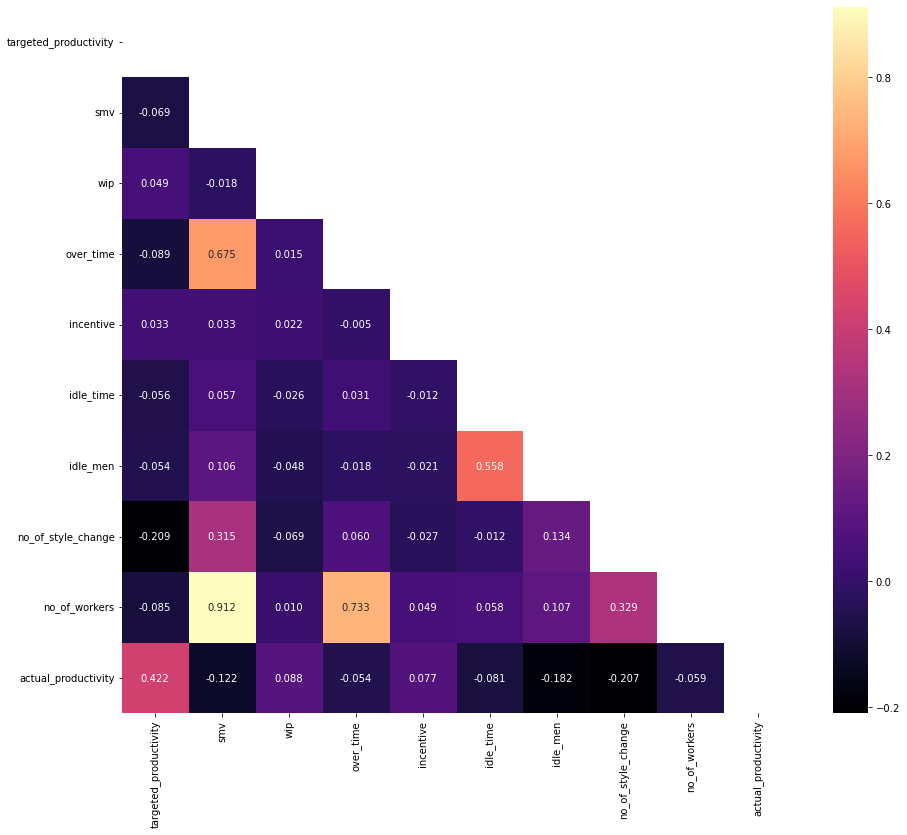

In [15]:
mask = np.triu(corr)
plt.figure(figsize=(15, 13))
sns.heatmap(corr, cmap="magma", mask=mask, annot=True, fmt='.3f')
plt.show()

- 실제 생산량과 가장 상관성이 큰 항목은 목표생산량임
- 실제 생산량과 초과근무시간(over_time), idle_time, idle_men, no_of_style_change, no_of_workers 는 상관성이 없는 것으로 판단됨
- 작업에 할당된 시간과 노동자 수는 높은 상관성을 보임 

# 데이터 시각화

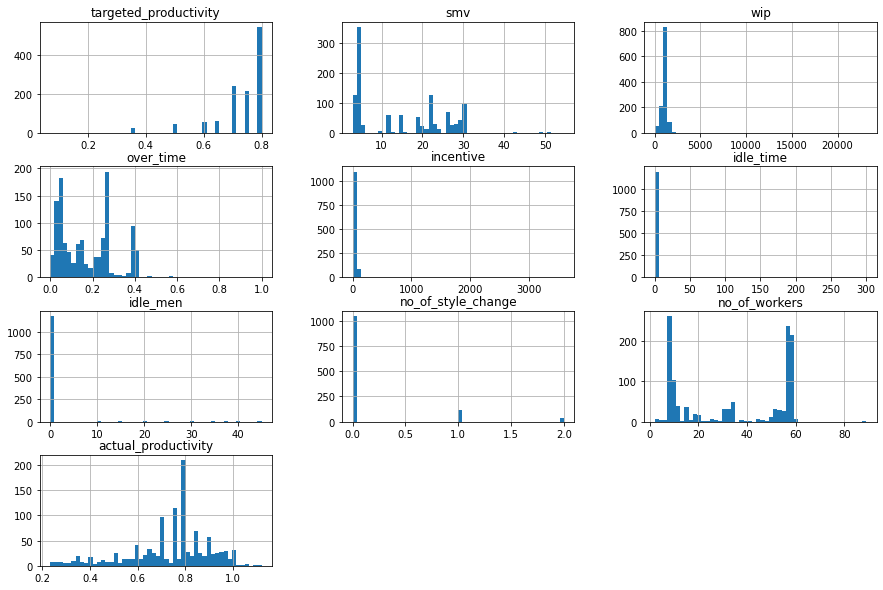

In [16]:
train.hist(figsize=(15, 10), bins=50);

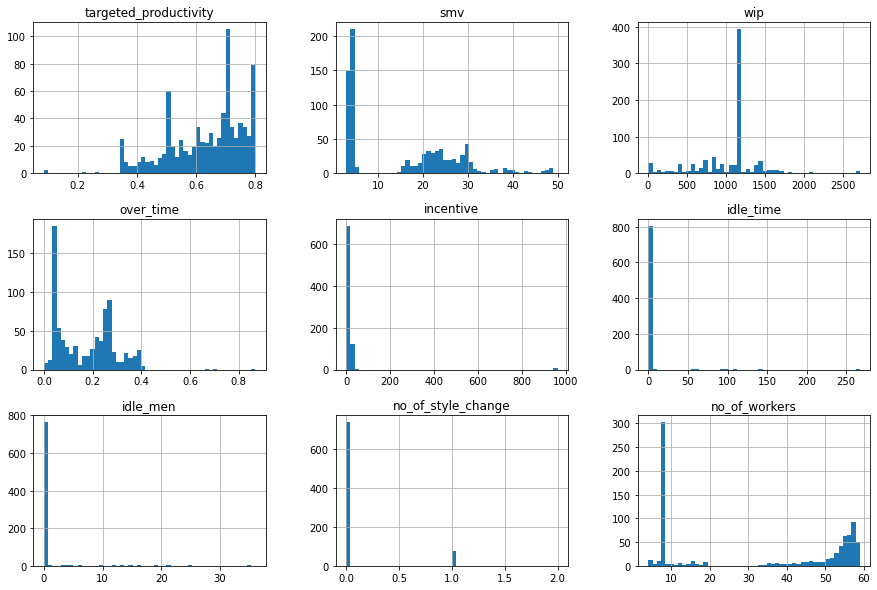

In [17]:
test.hist(figsize=(15,10), bins=50);

<AxesSubplot:xlabel='department', ylabel='count'>

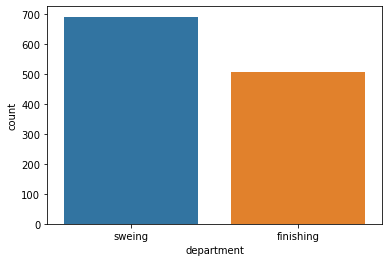

In [18]:
sns.countplot(data=train, x="department")

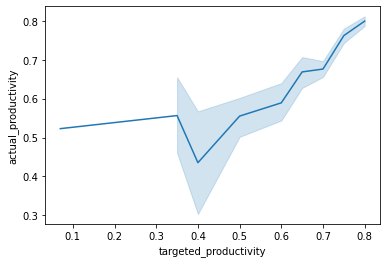

In [19]:
sns.lineplot(data=train, x="targeted_productivity", y="actual_productivity");

- 목표 생산량을 약 0.35 이상의 값으로 설정하면 신뢰구간이 넓어지는 것을 파악

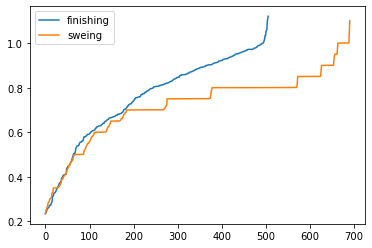

In [23]:
train[train.department=="finishing"]["actual_productivity"].sort_values().reset_index(drop=True).plot()
train[train.department=="sweing"]["actual_productivity"].sort_values().reset_index(drop=True).plot()

plt.legend(["finishing", "sweing"]);

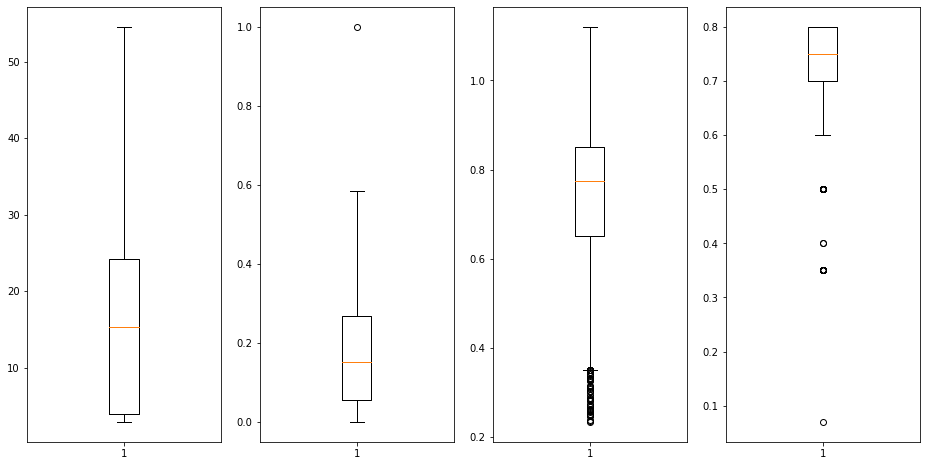

In [24]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.boxplot(train["smv"])
ax2.boxplot(train["over_time"])
ax3.boxplot(train["actual_productivity"])
ax4.boxplot(train["targeted_productivity"])

plt.show()

# 데이터 전처리

In [25]:
# 분기 컬럼을 구성하는 데이터를 Int 타입으로 변경
train["quarter_num"] = train["quarter"].map(lambda x: int(x.strip()[-1]))
test["quarter_num"] = test["quarter"].map(lambda x: int(x.strip()[-1]))

In [26]:
# 부서 0, 1로 원핫인코딩 처리
train["department_num"] = pd.get_dummies(data=train["department"], drop_first=True)
test["department_num"] = pd.get_dummies(data=test["department"], drop_first=True)

In [27]:
train["day"].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [28]:
# 요일 전처리 = 월:0, 화:1, 수:2, 목:3, 금(X), 토:4, 일:5
train["day"] = train["day"].str.strip()

train.loc[train["day"] == "Monday" ,"day_num"] = 0
train.loc[train["day"] == "Tuesday" ,"day_num"] = 1
train.loc[train["day"] == "Wednesday" ,"day_num"] = 2
train.loc[train["day"] == "Thursday" ,"day_num"] = 3
train.loc[train["day"] == "Saturday" ,"day_num"] = 4
train.loc[train["day"] == "Sunday" ,"day_num"] = 5

In [29]:
# 요일 전처리 = 월:0, 화:1, 수:2, 목:3, 금(X), 토:4, 일:5
test["day"] = test["day"].str.strip()

test.loc[test["day"] == "Monday" ,"day_num"] = 0
test.loc[test["day"] == "Tuesday" ,"day_num"] = 1
test.loc[test["day"] == "Wednesday" ,"day_num"] = 2
test.loc[test["day"] == "Thursday" ,"day_num"] = 3
test.loc[test["day"] == "Saturday" ,"day_num"] = 4
test.loc[test["day"] == "Sunday" ,"day_num"] = 5

In [31]:
train.head(2)

,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_num,department_num,day_num
ID,,,,,,,,,,,,,,,,
TRAIN_0000,Quarter1,sweing,Thursday,0.80,26.16,1108,0.27315,98,0,0,0,59,0.94073,1,1,3.0
TRAIN_0001,Quarter1,finishing,Thursday,0.75,3.94,1190,0.03704,0,0,0,0,8,0.88650,1,0,3.0


In [32]:
test.head(2)

,quarter,department,day,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_num,department_num,day_num
ID,,,,,,,,,,,,,,,
TEST_0000,Quarter2,sweing,Sunday,0.58792,37.82119,732,0.39583,7,0,0,0,57,2,1,5.0
TEST_0001,Quarter1,sweing,Sunday,0.70000,37.88145,710,0.35666,0,0,0,0,57,1,1,5.0


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, TRAIN_0000 to TRAIN_1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   targeted_productivity  1197 non-null   float64
 4   smv                    1197 non-null   float64
 5   wip                    1197 non-null   int64  
 6   over_time              1197 non-null   float64
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   int64  
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   int64  
 12  actual_productivity    1197 non-null   float64
 13  quarter_num            1197 non-null   int64  
 14  department_num         1197 non-null   uint8  

In [34]:
train.columns

Index(['quarter', 'department', 'day', 'targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change',
       'no_of_workers', 'actual_productivity', 'quarter_num', 'department_num',
       'day_num'],
      dtype='object')

In [35]:
feature_name = ['targeted_productivity', 'smv', 'wip',
       'over_time', 'incentive',
       'no_of_workers', 'quarter_num', 'department_num', 'day_num']

label_name = "actual_productivity"

In [36]:
X_train = train[feature_name]
y_train = train[label_name]
X_test = test[feature_name]

In [47]:
y_train.head(2)

ID
TRAIN_0000    0.94073
TRAIN_0001    0.88650
Name: actual_productivity, dtype: float64

# 최종 제출 모델

## 랜덤포레스트 & 그리드서치

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=300)
model

RandomForestRegressor(n_estimators=300, random_state=42)

In [38]:
max_depth = list(range(2, 9))
max_features = [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

pm = {"max_depth": max_depth, "max_features": max_features}
pm

{'max_depth': [2, 3, 4, 5, 6, 7, 8],
 'max_features': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]}

In [40]:
# 그리드서치로 베스트 모델 찾기
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model, pm, n_jobs=-1, cv=5, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=300, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]},
             verbose=3)

In [41]:
# 베스트 모델 찾기
clf.best_estimator_

RandomForestRegressor(max_depth=7, max_features=0.6, n_estimators=300,
                      random_state=42)

In [42]:
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=0.6, n_estimators=300,
                      random_state=42)

In [43]:
y_predict = best_model.predict(X_test)
y_predict

array([0.48690575, 0.49733526, 0.47565503, 0.48690575, 0.57945605,
       0.68954187, 0.75243852, 0.6737035 , 0.58188842, 0.69795917,
       0.71287213, 0.6270085 , 0.74516883, 0.75995992, 0.69741729,
       0.70116811, 0.76120964, 0.76120964, 0.7148078 , 0.71597312,
       0.41337006, 0.38572859, 0.51232556, 0.51194611, 0.44767387,
       0.49842562, 0.57173464, 0.55675237, 0.65894843, 0.68875798,
       0.67572992, 0.57348686, 0.78769741, 0.8367543 , 0.84624119,
       0.81528171, 0.49201861, 0.52566822, 0.52363484, 0.52566822,
       0.44409462, 0.47158561, 0.44957752, 0.46801336, 0.67895881,
       0.66839895, 0.69000774, 0.50252324, 0.3857541 , 0.38096103,
       0.43250013, 0.39633516, 0.6397835 , 0.44521823, 0.47849162,
       0.42912213, 0.50404714, 0.38277985, 0.45833375, 0.5041441 ,
       0.48304493, 0.48811849, 0.56222769, 0.49584269, 0.56424889,
       0.37034805, 0.37352089, 0.56586478, 0.5393472 , 0.53848744,
       0.5497506 , 0.60482606, 0.74516883, 0.72291184, 0.69741

In [48]:
y_predict[:2]

array([0.48690575, 0.49733526])

[CV 1/5] END .....max_depth=2, max_features=0.5;, score=0.238 total time=   0.2s
[CV 4/5] END .....max_depth=2, max_features=0.6;, score=0.168 total time=   0.2s
[CV 1/5] END .....max_depth=2, max_features=0.8;, score=0.239 total time=   0.3s
[CV 4/5] END .....max_depth=2, max_features=0.9;, score=0.141 total time=   0.3s
[CV 2/5] END .....max_depth=3, max_features=0.3;, score=0.261 total time=   0.2s
[CV 4/5] END .....max_depth=3, max_features=0.5;, score=0.255 total time=   0.2s
[CV 1/5] END .....max_depth=3, max_features=0.7;, score=0.272 total time=   0.3s
[CV 4/5] END .....max_depth=3, max_features=0.8;, score=0.245 total time=   0.3s
[CV 2/5] END ....max_depth=3, max_features=0.99;, score=0.283 total time=   0.4s
[CV 2/5] END .....max_depth=4, max_features=0.5;, score=0.355 total time=   0.3s
[CV 5/5] END .....max_depth=4, max_features=0.6;, score=0.276 total time=   0.3s
[CV 3/5] END .....max_depth=4, max_features=0.8;, score=0.488 total time=   0.3s
[CV 1/5] END ....max_depth=4

[CV 3/5] END .....max_depth=2, max_features=0.5;, score=0.278 total time=   0.2s
[CV 5/5] END .....max_depth=2, max_features=0.6;, score=0.119 total time=   0.2s
[CV 3/5] END .....max_depth=2, max_features=0.8;, score=0.309 total time=   0.3s
[CV 2/5] END ....max_depth=2, max_features=0.99;, score=0.166 total time=   0.3s
[CV 3/5] END .....max_depth=3, max_features=0.3;, score=0.305 total time=   0.2s
[CV 1/5] END .....max_depth=3, max_features=0.6;, score=0.277 total time=   0.3s
[CV 4/5] END .....max_depth=3, max_features=0.7;, score=0.255 total time=   0.3s
[CV 2/5] END .....max_depth=3, max_features=0.9;, score=0.283 total time=   0.3s
[CV 5/5] END ....max_depth=3, max_features=0.99;, score=0.222 total time=   0.3s
[CV 4/5] END .....max_depth=4, max_features=0.5;, score=0.312 total time=   0.3s
[CV 3/5] END .....max_depth=4, max_features=0.7;, score=0.485 total time=   0.3s
[CV 1/5] END .....max_depth=4, max_features=0.9;, score=0.323 total time=   0.4s
[CV 4/5] END ....max_depth=4

In [44]:
best_model.feature_importances_

array([0.27160617, 0.15766059, 0.04099682, 0.07963047, 0.2037207 ,
       0.13712211, 0.05712024, 0.0143145 , 0.03782839])

<AxesSubplot:>

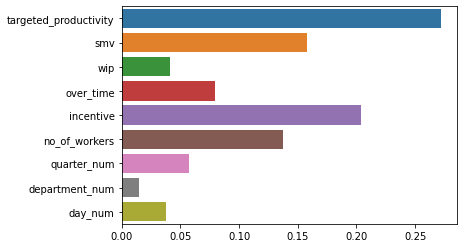

In [45]:
sns.barplot(x=best_model.feature_importances_, y=best_model.feature_names_in_)

In [ ]:
submit = pd.read_csv(file_name[3], index_col="ID")
submit.head(2)

In [ ]:
submit["actual_productivity"] = y_predict
submit.head(2) 

In [ ]:
save_name = "submit.csv"

submit.to_csv(save_name)
pd.read_csv(save_name).head(2)

**제출 결과** : 0.40315